# Estimating Proportions
A different problem to the previous example (although computed the same way), where this needs to choose prior/probability to construct the distribution.

Use Euro problem as a motivating example 

## Euro problem
Spin an one Euro coin 250 times, get 140 heads, and 110 tails. Is this suspicious?
If the coin is unbiased then expect this result 7% of the time.

Can we conclude from these data if the coin is biased/fair?

Binomial distribution (where 7% came from) and Bayes theorem to calculate probability of the result.

## Binomial distribution
A fair coin spun twice has 4 outcomes: HH, HT, TH, TT that have equal probability

Generally follows the probability of n coin flips giving k heads:
(n k)p^k * (1-p)^(n-k)


In [2]:
from scipy.stats import binom
n=2
p=0.5
k=1

binom.pmf(k, n, p)

0.5000000000000002

In [3]:
#make array for 0, 1, or 2 heads
import numpy as np
ks = np.arange(n+1)
ps = binom.pmf(ks, n, p)
ps

array([0.25, 0.5 , 0.25])

In [4]:
from empiricaldist import Pmf
pmf_k = Pmf(ps, ks)
pmf_k

,probs
0,0.25
1,0.50
2,0.25


In [7]:
#another way to generalize
#function given n trials with p probability
def make_binomial(n, p):
    """Make a binomial Pmf."""
    ks = np.arange(n+1)
    ps = binom.pmf(ks, n, p)
    return Pmf(ps, ks)

pmf_k = make_binomial(n=250, p=0.5)


<AxesSubplot:>

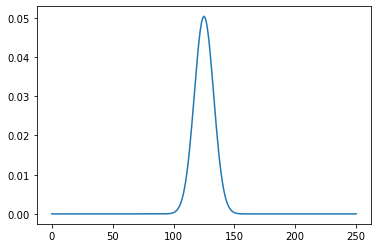

In [13]:
pmf_k.plot(label='n=250, p=0.5')

In [14]:
#calc most likely result
pmf_k.max_prob()


125

In [17]:
#how often expect to get most likely result?
pmf_k[125]*100 



5.041221314730966

In [21]:
#how often get the motivating example 140 or more extreme?
def prob_ge(pmf, threshold):
    """Probability of quantities greater than threshold."""
    ge = (pmf.qs >= threshold)
    total = pmf[ge].sum()
    return total

pmf_k.prob_ge(140)*100

3.321057562002163

Text(0.5, 0.98, 'Binomial distribution')

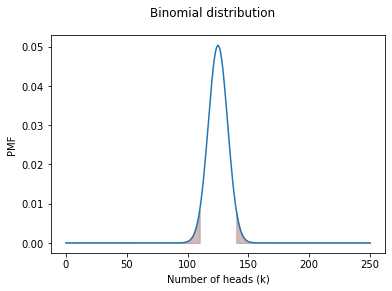

In [23]:
import matplotlib.pyplot as plt

def fill_below(pmf):
    qs = pmf.index
    ps = pmf.values
    plt.fill_between(qs, ps, 0, color='C5', alpha=0.4)

qs = pmf_k.index
fill_below(pmf_k[qs>=140])
fill_below(pmf_k[qs<=110])
pmf_k.plot(label='n=250, p=0.5')

plt.xlabel('Number of heads (k)')
plt.ylabel('PMF')
plt.suptitle('Binomial distribution')

# Bayesian Estimation¶

A coin has some probability associated with which side it lands on. Factors like the distribution of the coin's weight determine this.  If a coin is perfectly balanced, we might expect it to be fair (50-50).  However if it's lopsided, a significant bias may be introduced. 

In [26]:
#construct priors
hypos = np.linspace(0, 1, 101)
prior = Pmf(1, hypos)

likelihood_heads = hypos
likelihood_tails = 1 - hypos

#likelihood options as dictionary
likelihood = {
    'H': likelihood_heads,
    'T': likelihood_tails
}

#motivating example
dataset = 'H' * 140 + 'T' * 110

In [34]:
#update function
def update_euro(pmf, dataset):
    """Update pmf with a given sequence of H and T."""
    for data in dataset:
        pmf *= likelihood[data]

    pmf.normalize()

<AxesSubplot:>

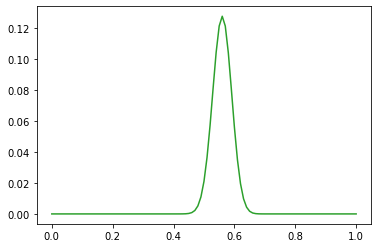

In [35]:
posterior = prior.copy()
update_euro(posterior, dataset)
posterior.plot(color='C2')

In [36]:
posterior.max_prob()

0.56

Bayes shows that the value is relatively expected.

# Triangle prior

In prior examples, we have been assuming a uniform distribution.  This may not be the best assumption.  

In [37]:
uniform = Pmf(1, hypos, name='uniform')
uniform.normalize()

101

May prefer a distribution with more weight near 0.5 and less at the extrema

In [44]:
#0-50
ramp_up = np.arange(50)

#50-0
ramp_down = np.arange(50, -1, -1)

#join
a = np.append(ramp_up, ramp_down)

triangle = Pmf(a, hypos, name='triangle')
triangle.normalize()


2500

<AxesSubplot:>

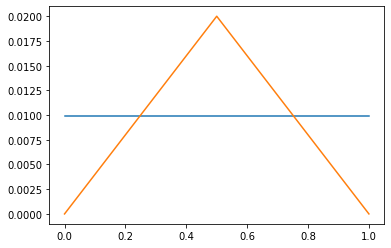

In [46]:
#Plot
uniform.plot()
triangle.plot()


In [47]:
#Update priors with data
update_euro(uniform, dataset)
update_euro(triangle, dataset)

<AxesSubplot:>

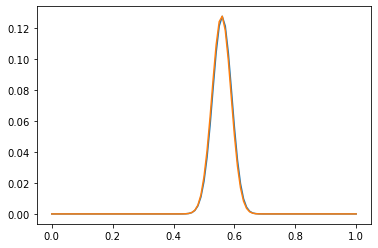

In [48]:
#Plot posterior
uniform.plot()
triangle.plot()

Differences are hardly noticable after incoporating data.
This is referred to as swamping out priors

# The Binomial Likelihood Function¶

More efficient to calculate the distribution at once rather than simulation. This can be done using the binomial distribution taken from scipy

In [49]:
from scipy.stats import binom

def update_binomial(pmf, data):
    """Update pmf using the binomial distribution."""
    k, n = data
    xs = pmf.qs
    likelihood = binom.pmf(k, n, xs)
    pmf *= likelihood
    pmf.normalize()

Represent data as a tuple of k, n rather than a string

In [50]:
uniform2 = Pmf(1, hypos, name='uniform2')
data = 140, 250
update_binomial(uniform2, data)

In [51]:
#small difference from prior example due to rounding
np.allclose(uniform, uniform2)

True

# Bayesian Statistics 

Comparison between Euro coin flipping problem and 101 bowls problem
Bowl problem implies the prior while the Euro requires the investigator to make a subjective decision.
The prior in the Euro problem is derived from what we believe about coins (that there is a random 50-50 shot, even though it's determined based on the distribution of metal in the coin, which isn't random). The subjectivity in the prior distingishes Baysian Statistics and Bayes Theorem. Bayes theorem is a mathmatical law, while doing Bayesian statistics has subjectivity cooked in.


# Exercies

2. Exercise: Whenever you survey people about sensitive issues, you have to deal with social desirability bias, which is the tendency of people to adjust their answers to show themselves in the most positive light. One way to improve the accuracy of the results is randomized response.

As an example, suppose you want to know how many people cheat on their taxes. If you ask them directly, it is likely that some of the cheaters will lie. You can get a more accurate estimate if you ask them indirectly, like this: Ask each person to flip a coin and, without revealing the outcome,

If they get heads, they report YES.

If they get tails, they honestly answer the question “Do you cheat on your taxes?”

If someone says YES, we don’t know whether they actually cheat on their taxes; they might have flipped heads. Knowing this, people might be more willing to answer honestly.

Suppose you survey 100 people this way and get 80 YESes and 20 NOs. Based on this data, what is the posterior distribution for the fraction of people who cheat on their taxes? What is the most likely quantity in the posterior distribution?

In [ ]:
#build distribution
hypos = np.linspace(0, 1, 101)
#assume uniform prior (people are equally as likely to cheat on taxes as not cheat)
prior = Pmf(1, hypos)

#We know that if they flip heads they'll lie
likelihood = {
    'Y': 0.5 + hypos/2,
    'N': (1-hypos)/2
}